In [2]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sb

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
wine = pd.read_csv('WineQT.csv')

In [9]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
wine.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
y = wine['quality']
x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol']]

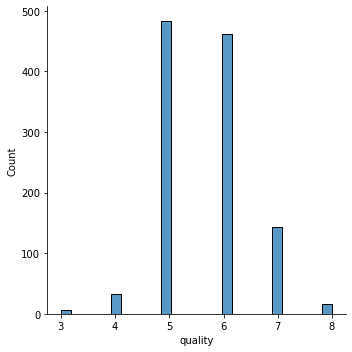

In [16]:
sb.displot(wine['quality'])

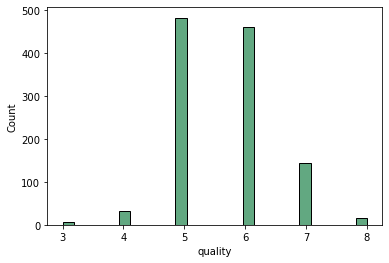

In [17]:
sb.histplot(wine['quality'], color = 'seagreen')
pt.show()

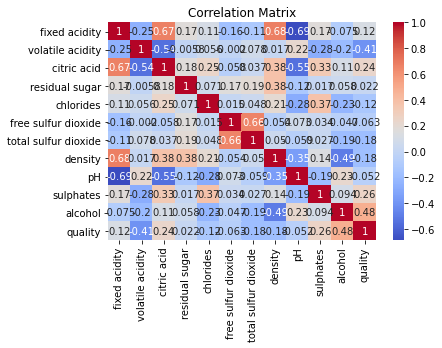

In [18]:
co_matrix = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol','quality']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
pt.title('Correlation Matrix')
pt.show()

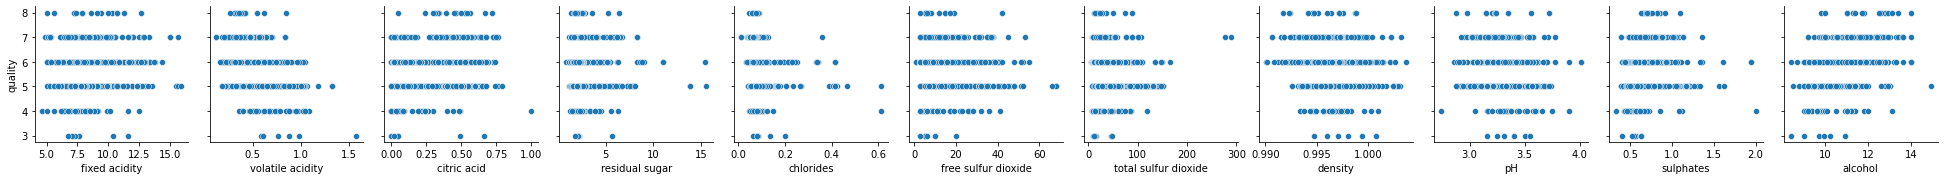

In [19]:
sb.pairplot(wine, x_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol'], y_vars = 'quality', kind = 'scatter')
pt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2) #training the model 80%, testing 20%

In [22]:
winelr = LinearRegression()

In [23]:
winelr.fit(xtrain, ytrain)

LinearRegression()

In [24]:
winelr.coef_

array([ 4.39386139e-02, -1.22097774e+00, -2.54371499e-01,  3.42115146e-02,
       -1.42555345e+00,  1.61953848e-03, -2.29812793e-03, -3.37527722e+01,
       -3.82919180e-01,  9.22938155e-01,  2.83046989e-01])

In [25]:
pd.DataFrame(winelr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.043939
volatile acidity,-1.220978
citric acid,-0.254371
residual sugar,0.034212
chlorides,-1.425553
free sulfur dioxide,0.001620
total sulfur dioxide,-0.002298
density,-33.752772
pH,-0.382919
sulphates,0.922938


In [26]:
pr = winelr.predict(xtest)

In [27]:
r2_score(ytest, pr)

0.28309020797876916

In [28]:
mean_absolute_error(ytest,pr)

0.4993375122199667

In [29]:
mean_squared_error(ytest, pr)

0.42882527709467727

In [30]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [31]:
winelr.predict([[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.92, 3.5, 0.65, 10.2]])

array([8.1896998])